In [2]:
!pip install -Uq fastai2
import fastai2
from fastai2 import *
import fastai.vision.all as fv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 5.0 MB/s eta 0:00:00


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [26]:
types = "Valid", "Invalid"
path = 'gdrive/MyDrive/ASMBL_Training/pictures'
p_path=Path(path)
fns = get_image_files(path)
fns

(#2266) [Path('gdrive/MyDrive/ASMBL_Training/pictures/image133 (1).jpg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/image133.jpg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/image134.jpg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/Valid/s-l1600 (1).jpeg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/Valid/s-l16001.jpeg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/Valid/s-l16003 (1).jpeg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/Valid/s-l16004 (1).jpeg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/Valid/s-l16005 (1).jpeg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/Valid/s-l16006 (1).jpeg'),Path('gdrive/MyDrive/ASMBL_Training/pictures/Valid/s-l16007 (1).jpeg')...]

In [1]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train,valid = add_props(lambda i,self: self[i])


NameError: ignored

In [28]:
validPics = DataBlock(
blocks=(ImageBlock, CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=Resize(128))

In [29]:
dls = validPics.dataloaders(path)

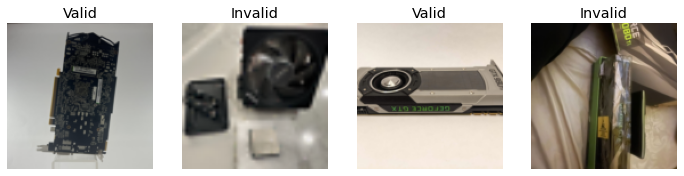

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.733659,0.337941,0.100287,04:15


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.316921,0.226423,0.057307,04:06
1,0.217235,0.245463,0.051576,04:09
2,0.156166,0.225778,0.048711,04:07
3,0.110896,0.214421,0.045845,04:01


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


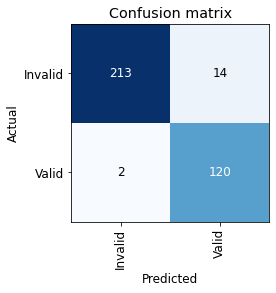

In [ ]:
interp = fv.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

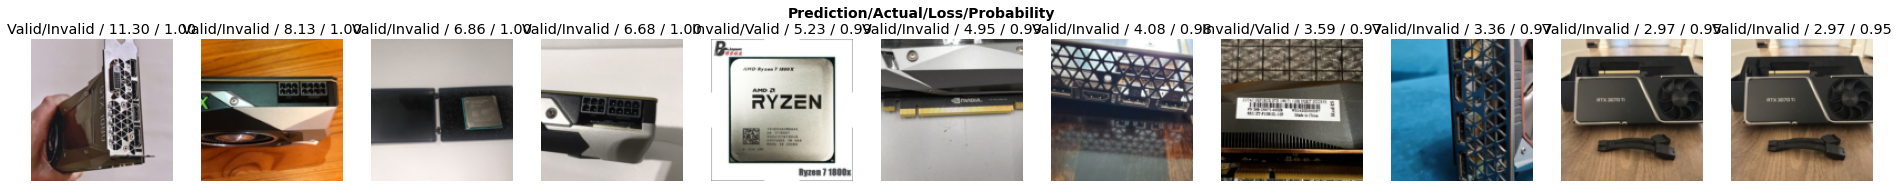

In [ ]:
interp.plot_top_losses(11, nrows=1)

In [ ]:
learn.path = Path('gdrive/MyDrive/ASMBL_Training')
learn.export("asmbl_model.pkl")
path = Path('gdrive/MyDrive/ASMBL_Training')
path.ls(file_exts='.pkl')
#Output (#1) [Path('export.pkl')]

(#1) [Path('gdrive/MyDrive/ASMBL_Training/asmbl_model.pkl')]

In [ ]:
learn_inf = load_learner(path/'asmbl_model.pkl')
learn_inf.dls.vocab

['Invalid', 'Valid']

In [ ]:
import shutil

In [ ]:
files = get_image_files("gdrive/MyDrive/ASMBL_Training/imgs")
for index in range(100):
  img = PILImage.create(files[index])
  pred,pred_idx,probs = learn_inf.predict(img)
  dest = str(files[index]).replace("imgs","test")
  print(dest)
  if pred == "Valid":
    shutil.copyfile(files[index], dest)

gdrive/MyDrive/ASMBL_Training/test/image299.jpg


gdrive/MyDrive/ASMBL_Training/test/image304.jpg


gdrive/MyDrive/ASMBL_Training/test/image311.jpg


gdrive/MyDrive/ASMBL_Training/test/image312.jpg


gdrive/MyDrive/ASMBL_Training/test/image326.jpg


gdrive/MyDrive/ASMBL_Training/test/image328.jpg


gdrive/MyDrive/ASMBL_Training/test/image334.jpg


gdrive/MyDrive/ASMBL_Training/test/image341.jpg


gdrive/MyDrive/ASMBL_Training/test/image340.jpg


gdrive/MyDrive/ASMBL_Training/test/image343.jpg


gdrive/MyDrive/ASMBL_Training/test/image348.jpg


gdrive/MyDrive/ASMBL_Training/test/image349.jpg


gdrive/MyDrive/ASMBL_Training/test/image350.jpg


gdrive/MyDrive/ASMBL_Training/test/image352.jpg


gdrive/MyDrive/ASMBL_Training/test/image355.jpg


gdrive/MyDrive/ASMBL_Training/test/image354.jpg


gdrive/MyDrive/ASMBL_Training/test/image356.jpg


gdrive/MyDrive/ASMBL_Training/test/image357.jpg


gdrive/MyDrive/ASMBL_Training/test/image358.jpg


gdrive/MyDrive/ASMBL_Training/test/image367.jpg


gdrive/MyDrive/ASMBL_Training/test/image373.jpg


gdrive/MyDrive/ASMBL_Training/test/image374.jpg


gdrive/MyDrive/ASMBL_Training/test/image381.jpg


gdrive/MyDrive/ASMBL_Training/test/image385.jpg


gdrive/MyDrive/ASMBL_Training/test/image394.jpg


gdrive/MyDrive/ASMBL_Training/test/image401.jpg


gdrive/MyDrive/ASMBL_Training/test/image406.jpg


gdrive/MyDrive/ASMBL_Training/test/image411.jpg


gdrive/MyDrive/ASMBL_Training/test/image410.jpg


gdrive/MyDrive/ASMBL_Training/test/image412.jpg


gdrive/MyDrive/ASMBL_Training/test/image413.jpg


gdrive/MyDrive/ASMBL_Training/test/image414.jpg


gdrive/MyDrive/ASMBL_Training/test/image416.jpg


gdrive/MyDrive/ASMBL_Training/test/image415.jpg


gdrive/MyDrive/ASMBL_Training/test/image417.jpg


gdrive/MyDrive/ASMBL_Training/test/image418.jpg


gdrive/MyDrive/ASMBL_Training/test/image420.jpg


gdrive/MyDrive/ASMBL_Training/test/image421.jpg


gdrive/MyDrive/ASMBL_Training/test/image424.jpg


gdrive/MyDrive/ASMBL_Training/test/image423.jpg


gdrive/MyDrive/ASMBL_Training/test/image434.jpg


gdrive/MyDrive/ASMBL_Training/test/image436.jpg


gdrive/MyDrive/ASMBL_Training/test/image435.jpg


gdrive/MyDrive/ASMBL_Training/test/image448.jpg


gdrive/MyDrive/ASMBL_Training/test/image451.jpg


gdrive/MyDrive/ASMBL_Training/test/image452.jpg


gdrive/MyDrive/ASMBL_Training/test/image453.jpg


gdrive/MyDrive/ASMBL_Training/test/image454.jpg


gdrive/MyDrive/ASMBL_Training/test/image457.jpg


gdrive/MyDrive/ASMBL_Training/test/image455.jpg


gdrive/MyDrive/ASMBL_Training/test/image456.jpg


gdrive/MyDrive/ASMBL_Training/test/image459.jpg


gdrive/MyDrive/ASMBL_Training/test/image458.jpg


gdrive/MyDrive/ASMBL_Training/test/image462.jpg


gdrive/MyDrive/ASMBL_Training/test/image464.jpg


gdrive/MyDrive/ASMBL_Training/test/image463.jpg


gdrive/MyDrive/ASMBL_Training/test/image465.jpg


gdrive/MyDrive/ASMBL_Training/test/image466.jpg


gdrive/MyDrive/ASMBL_Training/test/image468.jpg


gdrive/MyDrive/ASMBL_Training/test/image469.jpg


gdrive/MyDrive/ASMBL_Training/test/image472.jpg


gdrive/MyDrive/ASMBL_Training/test/image471.jpg


gdrive/MyDrive/ASMBL_Training/test/image470.jpg


gdrive/MyDrive/ASMBL_Training/test/image474.jpg


gdrive/MyDrive/ASMBL_Training/test/image473.jpg


gdrive/MyDrive/ASMBL_Training/test/image476.jpg


gdrive/MyDrive/ASMBL_Training/test/image477.jpg


gdrive/MyDrive/ASMBL_Training/test/image480.jpg


gdrive/MyDrive/ASMBL_Training/test/image479.jpg


gdrive/MyDrive/ASMBL_Training/test/image481.jpg


gdrive/MyDrive/ASMBL_Training/test/image485.jpg


gdrive/MyDrive/ASMBL_Training/test/image486.jpg


gdrive/MyDrive/ASMBL_Training/test/image487.jpg


gdrive/MyDrive/ASMBL_Training/test/image491.jpg


gdrive/MyDrive/ASMBL_Training/test/image492.jpg


gdrive/MyDrive/ASMBL_Training/test/image494.jpg


gdrive/MyDrive/ASMBL_Training/test/image493.jpg


gdrive/MyDrive/ASMBL_Training/test/image495.jpg


gdrive/MyDrive/ASMBL_Training/test/image496.jpg


gdrive/MyDrive/ASMBL_Training/test/image497.jpg


gdrive/MyDrive/ASMBL_Training/test/image498.jpg


gdrive/MyDrive/ASMBL_Training/test/image503.jpg


gdrive/MyDrive/ASMBL_Training/test/image509.jpg


gdrive/MyDrive/ASMBL_Training/test/image515 (1).jpg


gdrive/MyDrive/ASMBL_Training/test/image515.jpg


gdrive/MyDrive/ASMBL_Training/test/image514.jpg


gdrive/MyDrive/ASMBL_Training/test/image519.jpg


gdrive/MyDrive/ASMBL_Training/test/image520.jpg


gdrive/MyDrive/ASMBL_Training/test/image523.jpg


gdrive/MyDrive/ASMBL_Training/test/image522.jpg


gdrive/MyDrive/ASMBL_Training/test/image521.jpg


gdrive/MyDrive/ASMBL_Training/test/image526.jpg


gdrive/MyDrive/ASMBL_Training/test/image525.jpg


gdrive/MyDrive/ASMBL_Training/test/image524.jpg


gdrive/MyDrive/ASMBL_Training/test/image527.jpg


gdrive/MyDrive/ASMBL_Training/test/image528.jpg


gdrive/MyDrive/ASMBL_Training/test/image530.jpg


gdrive/MyDrive/ASMBL_Training/test/image529 (1).jpg


gdrive/MyDrive/ASMBL_Training/test/image529.jpg


gdrive/MyDrive/ASMBL_Training/test/image532.jpg


In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Invalid; Probability: 1.0000')